# Analisa Penyebab Keterlambatan Pesawat 

Di Notebook ini, kita akan menganalisis data penyebab keterlambatan pesawat berdasarkan waktu, bandara dan maskapai. Data yang diambil ialah data keterlambatan pesawat pada tahun 2017 hingga 2022 yang berasal dari Bureau of Transportation Statistics (BTS). kita akan mencoba menjawab beberapa pertanyaan berikut;
<ul>
    <li>Maskapai mana yang memiliki penerbangan yang paling banyak?</li>
    <li>Kota mana yang memiliki penerbangan yang paling banyak?</li>
    <li>Kota mana yang lebih sering terlambat? </li>
    <li>Kota mana yang memiliki kemungkinan terlambat lebih besar?</li>
    <li>Kapan Penerbangan di Amerika mengalami peek season?</li>
    <li>Di waktu kapan penerbangan di Amerika mengalami keterlambatan terbesar?</li>
    <li>Kota dan maskapai mana yang memiliki waktu terlambat paling lama dalam waktu menit? </li>
<ul> 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



### Data Preparation

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 101315 non-null  int64  
 1   month                101315 non-null  int64  
 2   carrier              101315 non-null  object 
 3   carrier_name         101315 non-null  object 
 4   airport              101315 non-null  object 
 5   airport_name         101315 non-null  object 
 6   arr_flights          101157 non-null  float64
 7   arr_del15            100960 non-null  float64
 8   carrier_ct           101157 non-null  float64
 9   weather_ct           101157 non-null  float64
 10  nas_ct               101157 non-null  float64
 11  security_ct          101157 non-null  float64
 12  late_aircraft_ct     101157 non-null  float64
 13  arr_cancelled        101157 non-null  float64
 14  arr_diverted         101157 non-null  float64
 15  arr_delay        

### Informasi Pada Data

Data yang ada di dataset ini sepertinya cukup lengkap, meskipun ada perbedaan jumlah yang tidak terlalu signifikan seperti pada kolom arr_del15, lalu disini kita juga memiliki 3 nilai baris. Berikut penjelasan pada kolom; <br>


year = Tahun pada data diambil.<br>
month = Bulan pada data diambil.<br>
carrier = Kode Maskapai,<br>
carrier_name = Nama Maskapai.<br>
airport = Kode Airport.<br>
airport_name = Nama pada Airport.<br>
arr_flight = Jumlah pada penerbangan yang tiba di Airport.<br>
arr_del15 = Jumlah penerbangan yang terlambat lebih dari 15 menit.<br>
carrier_ct = Jumlah penerbangan yang terlambat karena maskapai udara.<br>
weather_ct = jumlah Penerbangan yang terlambat karena faktor cuaca.<br>
nas_ct = jumlah penerbangan yang terlambat karena National Aviation System (Seperti trafik penerbangan yang tinggi).<br>
security_ct = Jumlah penerbang yang terlambat karena melanggar keamanan.<br>
late_aircraft_ct = Jumlah penerbangan yang terlambat karena penerbangan yang lain tertunda karena menggunakan pesawat yang sama.<br>
arr_canceled = Jumlah penerbangan yang dibatalkan.<br>
arr_diverted = Jumlah penerbangan yang dialihkan.<br>
arr_delay = Total waktu (Menit) penerbangan yang terlambat.<br>
carrier_delay = Total waktu (Menit) keterlambatan karena maskapai.<br>
weather_delay = Total waktu (Menit) keterlambatan karena cuaca yang buruk.<br>
nas_delay = Total waktu (Menit) keterlambatan karena National Aviation System.<br>
security_delay = Total Waktu (Menit) Keterlambatan karena masalah keamanan.<br>
late_aircraft_delay = Total waktu (Menit) keterlambatan karena penerbangan sebelumnya yang dipesawat terlambat. <br>

In [4]:
#menampilkan 5 data teratas.
df.tail(9)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
101306,2017,1,WN,Southwest Airlines Co.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",2046.0,654.0,125.99,4.64,...,0.65,371.46,43.0,0.0,31683.0,6654.0,264.0,5394.0,20.0,19351.0
101307,2017,1,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",311.0,55.0,20.81,0.56,...,0.00,26.01,3.0,1.0,3234.0,1227.0,95.0,281.0,0.0,1631.0
101308,2017,1,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",875.0,266.0,69.24,4.70,...,0.00,149.37,6.0,1.0,12920.0,3164.0,175.0,1450.0,0.0,8131.0
101309,2017,1,WN,Southwest Airlines Co.,SMF,"Sacramento, CA: Sacramento International",1942.0,607.0,127.53,6.29,...,0.30,370.68,34.0,4.0,30002.0,6280.0,375.0,3440.0,11.0,19896.0
101310,2017,1,WN,Southwest Airlines Co.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",1576.0,484.0,108.28,1.27,...,0.00,271.74,34.0,2.0,21762.0,4745.0,102.0,3468.0,0.0,13447.0
101311,2017,1,WN,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",2914.0,522.0,147.05,12.26,...,2.35,249.41,75.0,1.0,25536.0,7203.0,707.0,3860.0,65.0,13701.0
101312,2017,1,WN,Southwest Airlines Co.,TPA,"Tampa, FL: Tampa International",2390.0,447.0,140.36,17.54,...,0.46,208.69,29.0,2.0,24203.0,6666.0,1817.0,3389.0,13.0,12318.0
101313,2017,1,WN,Southwest Airlines Co.,TUL,"Tulsa, OK: Tulsa International",404.0,74.0,26.29,0.28,...,0.00,42.22,6.0,0.0,2905.0,993.0,17.0,170.0,0.0,1725.0
101314,2017,1,WN,Southwest Airlines Co.,TUS,"Tucson, AZ: Tucson International",372.0,139.0,26.44,0.78,...,0.00,98.16,3.0,1.0,7033.0,1163.0,47.0,516.0,0.0,5307.0


In [5]:
# Melihat ukuran pada dataframe.
df.shape

(101315, 21)

## Transforming Data

### Mengubah kolom tahun dan bulan menjadi 1 kolom

In [6]:
df['date'] = df['month'].astype(str) + df['year'].astype(str)
df['date'] = pd.to_datetime(df['date'],format = '%m%Y')

In [7]:
#menampilkan kolom date
df['date'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: date, dtype: datetime64[ns]

### Memisahkan data pada kolom airport_name

Dalam kolom airport name, terdapat nama kota serta kode provinsi, dengan mendapatkan nama kota dan kode provinsi, kita dapat membuat visualisasi berdasarkan peta, serta grouping perkota atau perprovinsi.

In [8]:
#mengambil nama kota menggunakan fungsi split
apt_name_airport_city = df["airport_name"].str.split(",", n = 1, expand = True)

In [9]:
#mengambil kode provinsi serta memisahkan nama airport
apt_name_airport_province= apt_name_airport_city[1].str.split(": ", n = 1, expand = True)

In [10]:
#memasukkan nama kota dan kode provinsi kedalam dataframe
df['city'] = apt_name_airport_city[0]
df['province']= apt_name_airport_province[0]
df['airport_name'] =apt_name_airport_province[1]

In [11]:
#menampilkan hasil pemisahhan
df[['city','province','airport_name']].head()

,city,province,airport_name
0,Allentown/Bethlehem/Easton,PA,Lehigh Valley International
1,Albany,GA,Southwest Georgia Regional
2,Nantucket,MA,Nantucket Memorial
3,Alexandria,LA,Alexandria International
4,Augusta,GA,Augusta Regional at Bush Field


In [12]:
df_backup = df.copy()

## Maskapai Mana Yang Memiliki Penerbangan Yang Paling Banyak?

In [13]:
dfe = df.sort_values(by=['arr_flights'], ascending=False)
dfe.groupby("carrier_name")['arr_flights'].sum().sort_values(ascending=False).head(7)

carrier_name
Southwest Airlines Co.    6803783.0
Delta Air Lines Inc.      4706042.0
American Airlines Inc.    4562100.0
SkyWest Airlines Inc.     3865834.0
United Air Lines Inc.     2939019.0
JetBlue Airways           1404733.0
Republic Airline          1283100.0
Name: arr_flights, dtype: float64

<AxesSubplot:xlabel='carrier_name'>

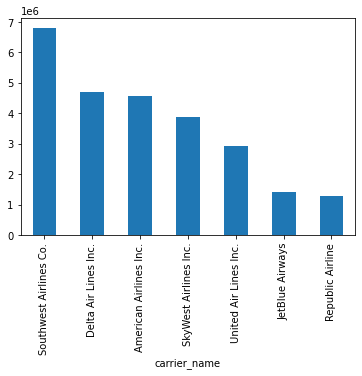

In [14]:
car_arr = dfe.groupby("carrier_name")['arr_flights'].sum().sort_values(ascending=False).head(7)
car_arr.plot(kind='bar')

 Tampaknya maskapai Southwest Airlines Co memiliki penerbangan terbanyak, diikuti oleh Delta Airlines Inc.

## Kota Mana yang Memiliki Penerbangan terbanyak?

In [39]:
dfe.groupby("city")['arr_flights'].sum().sort_values(ascending=False).head(10)

city
Chicago              1885843.0
Atlanta              1866608.0
Dallas/Fort Worth    1371595.0
Denver               1324159.0
New York             1196256.0
Houston              1073119.0
Los Angeles          1059705.0
Charlotte             999199.0
Phoenix               889581.0
Washington            841237.0
Name: arr_flights, dtype: float64

<AxesSubplot:xlabel='city'>

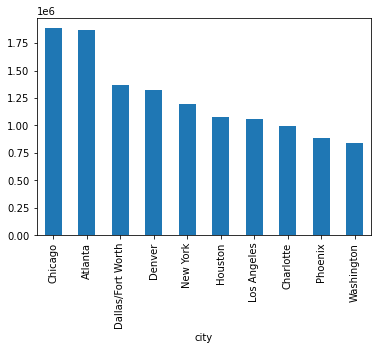

In [37]:
city_arr = dfe.groupby("city")['arr_flights'].sum().sort_values(ascending=False).head(10)
city_arr.plot(kind='bar')

Tampaknya Penerbangan di Amerika lebih banyak di antara kota Chicago dan kota Atlanta, diantara 2 kota ini memiliki selisih yang cukup dekat. Dengan Diantara 2 kota ini, apakah berpengaruh dengan jumlah penerbangan yang terlambat akibat terlambatnya penerbangan yang terlambat karena faktor lalu lintas udara yang ramai?

In [17]:
df_nas_ct = df.sort_values(by=['nas_ct'], ascending=False)
df_nas_ct.groupby("city")["nas_ct"].sum().sort_values(ascending=False).head(7)

city
Chicago              114174.93
New York             109383.64
Newark                94861.89
San Francisco         80937.06
Dallas/Fort Worth     80920.91
Atlanta               75610.51
Denver                69080.77
Name: nas_ct, dtype: float64

Benar, Kota Chicago memiliki tingkat keterlambatan penerbangan karena faktor lalu lintas udara yang ramai yang tertinggi, tetapi tidak diikuti oleh kota Atlanta, Melainkan Kota New York. Pertanyaannya adalah kenapa kota New York bisa menjadi kota yang tebih terlambat dibanding kota Atlanta, kota Dallas dan kota Denver? 

C:\Users\farha\AppData\Local\Temp\ipykernel_1188\1763160833.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_city_x = df_city_x.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()


<AxesSubplot:xlabel='city'>

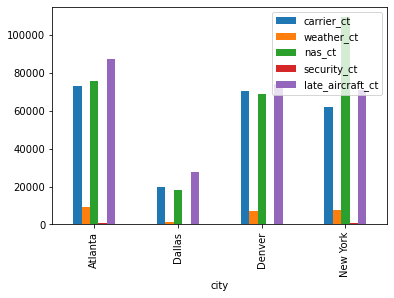

In [18]:
city_x = ['New York','Dallas','Denver','Atlanta']
df_city_x = df[df['city'].isin(city_x)]
df_city_x = df_city_x.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()
df_city_x.plot(kind='bar')

Terungkap bahwa penyebab kota New York memiliki tingkat keterlambatan faktor lalu lintas yang tinggi dibanding kota yang lain yan memiliki tingkat keterlambatannya lebih tinggi dibanding kota New Yok ialah Faktor Keterlambatan akibat kepadatan lalu lintas kota New York sendiri memiliki selisih yang besar dibanding faktor lainnya.

Text(0.5, 1.0, 'Keterlambatan Akibat kepadatan Lalin Udara')

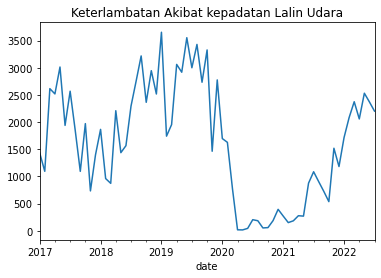

In [19]:
df_newyork_nas = df[(df['city'] == 'New York')]

df_ny_nas1 = df_newyork_nas.loc[(df_newyork_nas['date'] >= '2018-01-01')
                     & (df_newyork_nas['date'] < '2019-01-01')]
df_ny_nas2 = df_newyork_nas.loc[(df_newyork_nas['date'] >= '2019-01-01')
                     & (df_newyork_nas['date'] < '2020-01-01')]
df_ny_nas3 = df_newyork_nas.loc[(df_newyork_nas['date'] >= '2020-01-01')
                     & (df_newyork_nas['date'] < '2021-01-01')]
df_ny_nas4 = df_newyork_nas.loc[(df_newyork_nas['date'] >= '2021-01-01')
                     & (df_newyork_nas['date'] < '2022-01-01')]
df_newyork_nas.groupby('date')['nas_ct'].sum().plot()
plt.title('Keterlambatan Akibat kepadatan Lalin Udara')


Sepertinya pada tahun 2018 hingga tahun 2020 memiliki kepadatan tertinggi

## Kota yang memiliki tingkat keterlambatan tertinggi

In [20]:
#Menkalkulasikan semua keterlambatan
df_all_delay = df['carrier_ct']+df['weather_ct']+df['nas_ct']+df['security_ct']+df['late_aircraft_ct']
#menmasukkan kedalam df
df['all_delay'] = df_all_delay[0]

In [21]:
df_all_delay = df.sort_values(by=['all_delay'], ascending=False)
df_all_delay.groupby("city")["all_delay"].sum().sort_values(ascending=False).head(7)

city
Washington    3086.0
Portland      2662.0
New York      2560.0
Houston       2156.0
Chicago       2056.0
Columbus      1970.0
Nashville     1826.0
Name: all_delay, dtype: float64

<AxesSubplot:xlabel='city'>

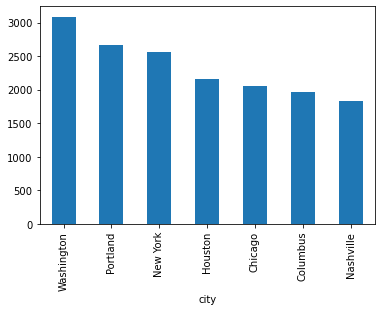

In [22]:
all_delay_city = df_all_delay.groupby("city")["all_delay"].sum().sort_values(ascending=False).head(7)
all_delay_city.plot(kind='bar')

Tampaknya Kota Washington memiliki tingkat keterlambatan yang cukup tinggi, dan perbedaanya yang cukup besar di antara kota ke-2 terbesar. Yang paling menarik untuk dieksplorasi adalah, apa faktor penyebab kota Washington menjadi kota yang paling terlambat?

C:\Users\farha\AppData\Local\Temp\ipykernel_1188\735868516.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_washington = df_washington_c.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()


<AxesSubplot:xlabel='city'>

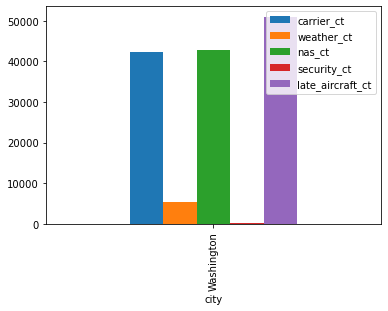

In [23]:
df_washington_c = df[(df['city'] == 'Washington')]
df_washington = df_washington_c.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()
df_washington.plot(kind='bar')

Dari visualisasi diatas, terlihat bahwa penyebab keterlambatannya yang utama ialah karena penerbangan yang lain tertunda karena menggunakan pesawat yang sama. Namun dari maskapai mana yang sering menyebabkan tertunda akibat menggunakan pesawat yang sama?

In [24]:
df_washington_carrier = df[(df['city'] == 'Washington')]
df_washington_carrier.groupby('carrier_name')['late_aircraft_ct'].sum().sort_values(ascending=False).head(5)

carrier_name
PSA Airlines Inc.         8723.18
American Airlines Inc.    8010.76
United Air Lines Inc.     7626.74
Southwest Airlines Co.    6570.87
Republic Airline          6064.91
Name: late_aircraft_ct, dtype: float64

Terlihat bahwa PSA Airlines Inc. ialah maskapai penyebab keterlambatan terbanyak di kota Washington. 

## Kota dengan persentase keterlambatan tertinggi

Dengan ini, Mari kita lihat kota yang memiki persentase keterlambatan tertinggi.

In [25]:
df_percentage = df.sort_values(by=['arr_flights'], ascending=False)
df_percentage = df_percentage.groupby('city', as_index=False).agg({"arr_flights": "sum", "all_delay": "sum"}).sort_values(['arr_flights','all_delay'],ascending = [False, False]).head(20).reset_index(drop=True)
df_percentage['percentage_of_delay'] =  df_percentage['all_delay'] / df_percentage['arr_flights'] * 100
df_percentage[['city','percentage_of_delay']].sort_values('percentage_of_delay',ascending=False).head(5)

,city,percentage_of_delay
9,Washington,0.366841
19,Baltimore,0.317209
16,Boston,0.248961
14,Detroit,0.245538
17,Newark,0.245164


Terlihat bahwa kota Washing memiliki persentase tertinggi dalam kemungkinan keterlambatan dalam penerbangan, diikuti dengan kota Baltimore dan kota Boston.

## Kapan Penerbangan di Amerika mengalami peek Season?

<AxesSubplot:xlabel='date'>

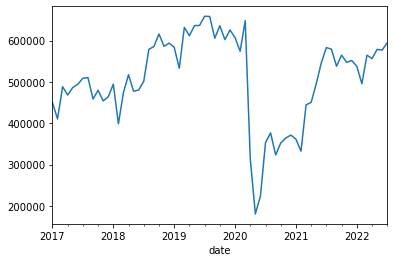

In [26]:
df.groupby("date")["arr_flights"].sum().plot()

Tampaknya pada pertengahan tahun 2019 hingga Q1 2020 memiliki puncaknya penerbangan pada saat itu, dan menariknya ada pemerosotan yang sangat tajam pada waktu sebelum Q2 tahun 2020 karena pada saat periode waktu tersebut terjadi pandemik. Lalu penerbangan mulai ramai kembali pada Q1 tahun 2021. Kembali ketujuan utama kita, yaitu kapan terjadinya keterlambatan pesawat tertinggi terjadi?

## Di waktu kapan penerbangan di Amerika mengalami keterlambatan terbesar?

<AxesSubplot:xlabel='date'>

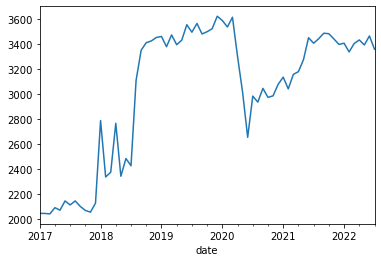

In [27]:
df.groupby("date")["all_delay"].sum().plot()

Pada tahun 2019 hingga tahun 2020 memiliki angka keterlambatan yang besar dan penurunan tajam yang terjadi pada mulainya waktu pandemik tidak setajam merosotnya jumlah penerbangan. Hingga pada saat itu kemungkinan sebagian besar penerbangan mengalami keterlambatan. Apakah benar? Mari kita analisa penyebab keterlambatan pada era pandemik dimulai.

In [28]:
df_down = df.loc[(df['date'] >= '2020-03-01')
                     & (df['date'] < '2020-07-01')]
df_down.groupby('date')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()

C:\Users\farha\AppData\Local\Temp\ipykernel_1188\292899175.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_down.groupby('date')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()


,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
date,,,,,
2020-03-01,16910.02,1093.09,19437.01,99.90,16179.91
2020-04-01,4497.78,294.84,2859.66,27.84,1358.06
2020-05-01,3665.56,419.17,2252.63,40.82,1415.82
2020-06-01,6618.98,1175.27,4133.91,69.61,2951.39


Pada era pandemik dimulai, penyebab yang lebih banyak menyebabkan keterlambatan ialah faktor maskapai, dan juga ada penerbangan yang dibatalkan. Mari kita lihat grafik dibatalkannya penerbangan.

<AxesSubplot:xlabel='date'>

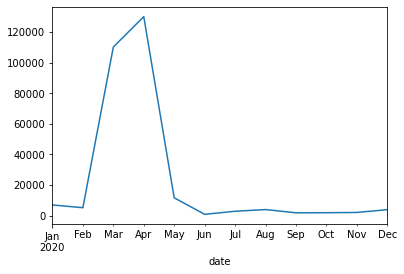

In [29]:
df_cancelled = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < '2021-01-01')]
df_cancelled.groupby('date')['arr_cancelled'].sum().plot()

Pada awal bulan maret 2020 terjadinya puncak dari pembatalan besar-besaran penerbangan karena faktor Covid19.

## Kota dan maskapai yang memiliki waktu terlambat paling lama dalam waktu (menit)

Disini kita akan menganalisa kota dan maskapai mana yang memiliki waktu terlambat paling lama dalam hitungan menit, karena kita akan mencari tahu apa saja yang membuat kota atau maskapai tersebut memiliki waktu terlambat yang lama.

In [30]:
#Menkalkulasikan semua keterlambatan
df_time_delay = df['carrier_delay']+df['weather_delay']+df['nas_delay']+df['security_delay']+df['late_aircraft_delay']
#menmasukkan kedalam dataframe
df['all_time_delay'] = df_time_delay[0]

<AxesSubplot:xlabel='city'>

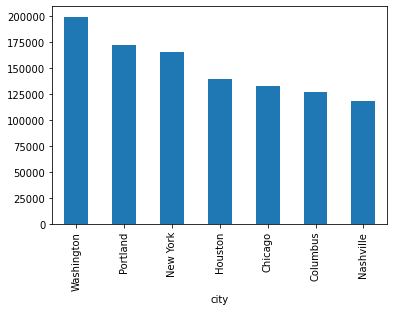

In [31]:
df_all_time_delay = df.sort_values(by=['all_time_delay'], ascending=False)
df_all_time_delay_br = df_all_time_delay.groupby("city")["all_time_delay"].sum().sort_values(ascending=False).head(7)
df_all_time_delay_br.plot(kind='bar')

Dari hasil visualisasi diatas, sepertinya kita tidak ingin pergi ke kota Washington. ya dibandingkan dengan jumlah penerbangan kota Washington yang tidak sebanding dengan kota-kota lainnya, kota Washington terlihat memiliki angka keterlambatannya yang paling banyak dan memiliki selisih yang cukup besar dibandingkan dengan kota Portland yang d urutan kedua kota yang paling terlambat dalam hitungan menit. Kira-kira apa penyebab keterlambatan yang menyebabkan kota Washington menjadi kota nomor 1?

C:\Users\farha\AppData\Local\Temp\ipykernel_1188\2494468706.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_washington_d = df_washington_d.groupby('city')['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'].sum()


Text(0.5, 1.0, 'Keterlambatan dalam Hitungan Menit')

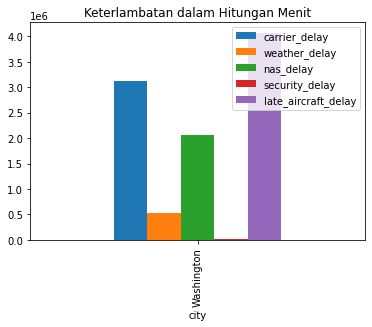

In [32]:
df_washington_d = df[(df['city'] == 'Washington')]
df_washington_d = df_washington_d.groupby('city')['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'].sum()
df_washington_d.plot(kind='bar')
plt.title('Keterlambatan dalam Hitungan Menit')

sebelum kita mencari insight dari visualisasi diatas, mari kita lihat kembali visualisasi faktor penyebab keterlambatan pada kota Washington terbanyak.

C:\Users\farha\AppData\Local\Temp\ipykernel_1188\1312953281.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_washington = df_washington_c.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()


Text(0.5, 1.0, 'Penyebab keterlambatan')

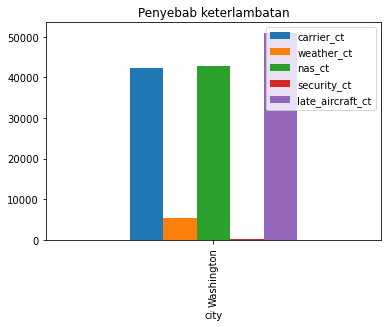

In [33]:
df_washington_c = df[(df['city'] == 'Washington')]
df_washington = df_washington_c.groupby('city')['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'].sum()
df_washington.plot(kind='bar')
plt.title('Penyebab keterlambatan')

dari kedua visualisasi diatas terlihat penyebab utama dan keterlambatan paling lama ialah faktor keterlambatan karena penerbangan sebelumnya yang pesawatnya terlambat.